# Correlation Analysis of Sensor Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Cleaning and Preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv("complex.csv")
df.head()

,time,s1,s2,s3
0,0,1.000000,2.00000,0.700000
1,1,1.010000,1.99995,0.707000
2,2,1.019999,1.99980,0.713999
3,3,1.029996,1.99955,0.720997
4,4,1.039989,1.99920,0.727993


In [34]:
# Show basic information
print("Data Overview:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1008 non-null   int64  
 1   s1      1008 non-null   float64
 2   s2      1008 non-null   float64
 3   s3      1008 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.6 KB
None

Missing Values:
time    0
s1      0
s2      0
s3      0
dtype: int64


Since the dataset has been loaded and basic information about it has been displayed, we can observe that there are no missing values in the dataset. Additionally, the dataset contains 1008 rows and 4 columns, with three sensor readings (`s1`, `s2`, `s3`) and a time column. This ensures that the data is clean and ready for further analysis, such as exploratory data analysis (EDA) and feature importance evaluation.

In [35]:
# Basic statistics
df.describe()

,time,s1,s2,s3
count,1008.000000,1008.000000,1008.000000,1008.000000
mean,503.500000,1.121555,0.940440,0.824718
std,291.128837,0.724906,0.721886,0.466721
min,0.000000,0.000001,0.000001,0.000002
25%,251.750000,0.307832,0.192443,0.412208
50%,503.500000,1.305817,0.892597,0.914072
75%,755.250000,1.807793,1.668055,1.265455
max,1007.000000,2.000000,2.000000,1.400000


Based on the `.describe()` summary of the dataset, the three sensor readings (`s1`, `s2`, and `s3`) show distinct characteristics. Sensor `s1` has a mean value around 1.63 and ranges from approximately 1.0 to 2.28, indicating a moderate level of variability. `s2` shows very little variation, with values tightly clustered around 2.0 (standard deviation ~0.0004), suggesting it might be a reference or control signal. On the other hand, `s3` steadily increases from 0.7 to around 1.4, reflecting a gradual trend rather than random fluctuations. The low standard deviations of `s2` and `s3` further imply stable measurements, with `s1` being the most dynamic among the three. These trends might point toward a predictable system where `s3` could be influenced by `s1`, while `s2` remains largely constant.

### Step 2: Exploratory Data Analysis (EDA)

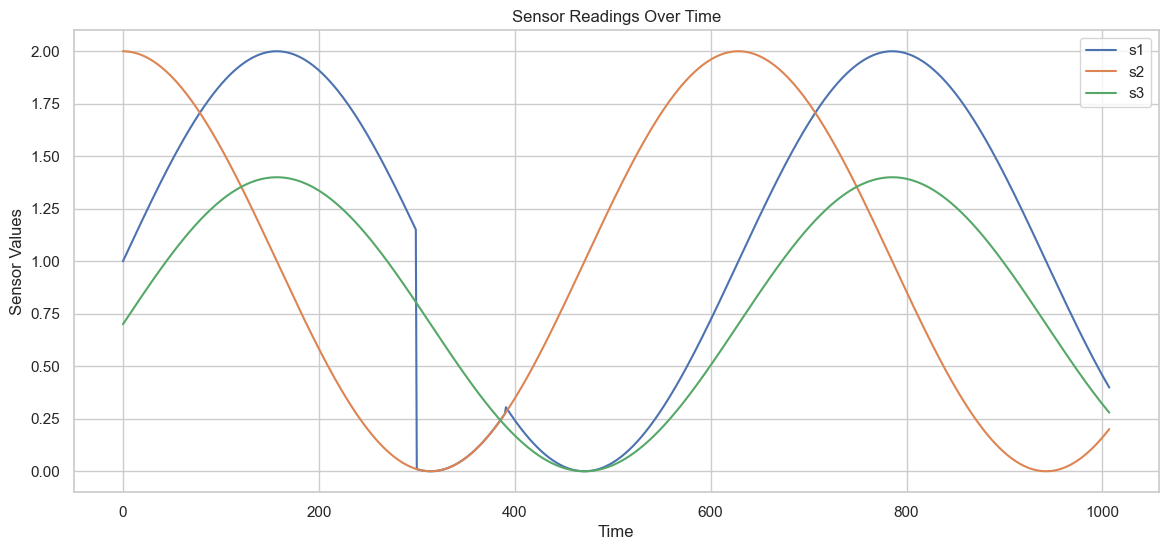

In [36]:
# Time Series Plots
plt.figure(figsize=(14, 6))
for col in ['s1', 's2', 's3']:
    plt.plot(df['time'], df[col], label=col)
plt.legend()
plt.title("Sensor Readings Over Time")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.grid(True)
plt.show()

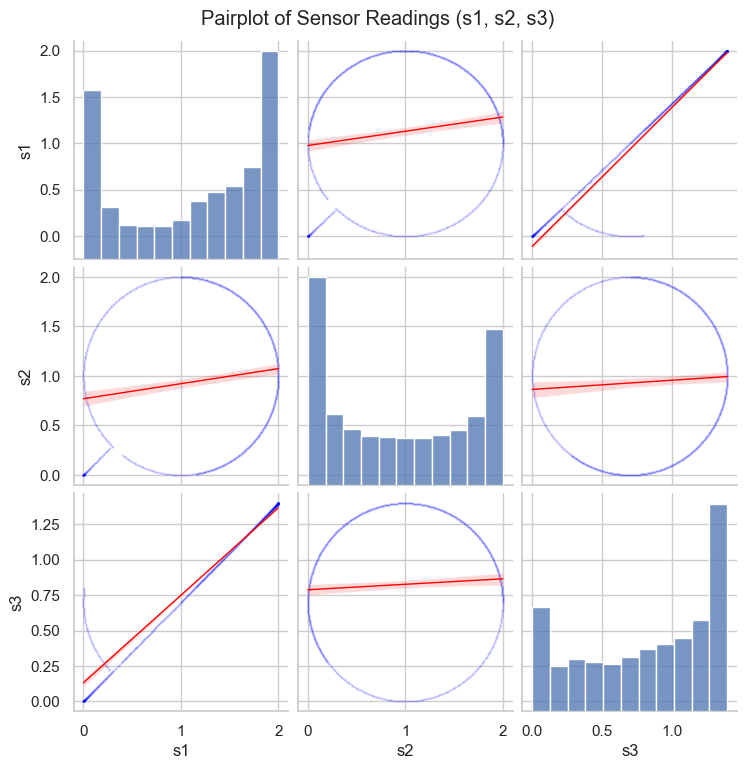

In [37]:
# Optional: Set style
sns.set_theme(style="whitegrid")

# Pairplot for sensor readings
sns.pairplot(df[['s1', 's2', 's3']],
    kind='reg',
    diag_kind='auto',
    plot_kws={'scatter_kws': {'s': 0.5, 'alpha': 0.1, 'color': 'blue'}, 'line_kws': {'color': 'red', 'linewidth': 1}})
plt.suptitle("Pairplot of Sensor Readings (s1, s2, s3)", y=1.02)
plt.show()

The pairplot of the sensor readings (`s1`, `s2`, `s3`) reveals several key relationships between the signals. 
- Most notably, the scatterplot between `s1` and `s3` shows a strong linear trend, indicating a very high positive correlation — likely meaning these two signals are directly related or transformations of each other. 
- On the other hand, the scatterplots involving `s2` (e.g., `s1` vs `s2` and `s2` vs `s3`) form distinct **circular or elliptical shapes**. This is a classic signature of **phase-shifted signals**, suggesting that `s2` may be a delayed or time-shifted version of `s1` or `s3`. Rather than being uncorrelated, this visual pattern hints at a dynamic temporal relationship — the values are similar but offset in time, as seen in sinusoidal signals with a phase difference.

The histograms along the diagonal add further context: `s1` and `s2` both have U-shaped or bimodal distributions, possibly due to their oscillatory nature, while `s3` shows a right-skewed distribution consistent with a cumulative or increasing trend.

In summary, the pairplot supports the idea that `s1` and `s3` are tightly linked in value, while `s2` is not noise or independent, but rather **temporally related** — possibly out of phase — forming a complex interaction that would benefit from further time-series or cross-correlation analysis.

To investigate this hypothesis, we apply a **cross-correlation analysis** between `s1` and `s2`. Cross-correlation helps quantify how much one signal lags behind or leads another. By subtracting the mean and using the `'full'` mode, we compute how aligned the two signals are at every possible time lag. The lag with the highest correlation score reveals where the alignment is strongest.

In [38]:
# Cross-correlation
corr = np.correlate(df['s1'] - df['s1'].mean(), df['s2'] - df['s2'].mean(), mode='full')
lags = np.arange(-len(df['s1']) + 1, len(df['s1']))
lag = lags[np.argmax(corr)]

print(f"Max correlation occurs at lag = {lag}")

Max correlation occurs at lag = 126


The result `Max correlation occurs at lag = 126` means that **sensor `s2` is most strongly correlated with `s1` when it is shifted by 126 time steps forward (or `s1` is shifted backward)**.

**In plain terms:**
- **`s2` is about 126 time units ahead of `s1`**, or
- **`s1` lags behind `s2` by 126 samples.**



**Now let's try this quick plot:**

This will visually align `s2` to `s1` using the calculated lag, making their **relationship clearer**.

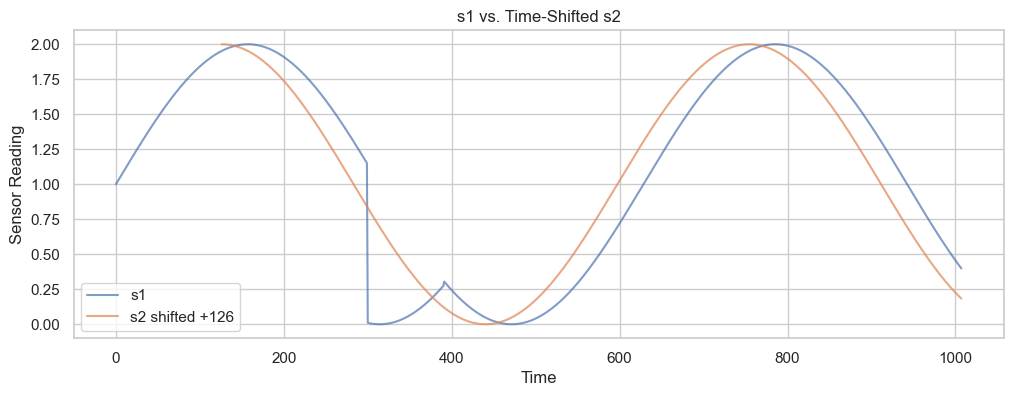

In [44]:

plt.figure(figsize=(12, 4))
plt.plot(df['s1'], label='s1', alpha=0.7)
plt.plot(df['s2'].shift(126), label='s2 shifted +126', alpha=0.7)  # Align s2 with s1
plt.legend()
plt.title('s1 vs. Time-Shifted s2')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.grid(True)
plt.show()

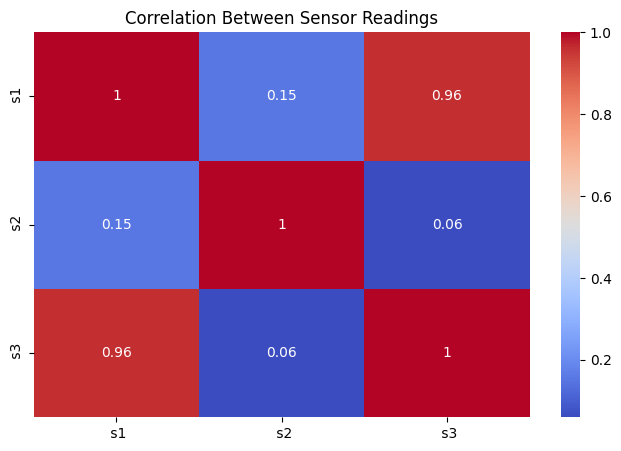

In [27]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[[' s1', ' s2', ' s3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Sensor Readings")
plt.show()

The correlation heatmap shows a **strong linear relationship between `s1` and `s3` (0.96)**, indicating they move closely together and likely capture the same underlying pattern. In contrast, **`s1` and `s2` (0.15)** and **`s2` and `s3` (0.06)** have very weak correlations, suggesting no immediate linear connection. However, earlier analysis using cross-correlation revealed that **`s2` is time-shifted (lag = 126)** relative to `s1`, which explains the low Pearson correlation despite an underlying relationship. In short, `s2` appears unrelated at first glance, but it's likely a **delayed version of `s1`**, and this can't be captured by standard correlation alone.